# Exercise 1:
Create a Method prints an image of your pokemon


##### HINT: You may need another attribute as well to store your image url within.

In [5]:
# Exercise 1:
# Create a Method prints an image of your pokemon

# HINT: You may need another attribute as well to store your image url within

# recreate your pokemon class here
import requests
from IPython.display import Image
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite =None
        self.poke_api_call()
        
    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        if response.status_code == 200:
            data = response.json()
            self.name = data['name']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'],types))
            self.weight = data['weight']
            abilities = data['abilities']
            self.abilities=list(map(lambda x: x['ability']['name'], abilities))
            self.sprite = data['sprites']['front_shiny']
            self.id = data['id']
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
            
    def display_img(self):
            display(Image(self.sprite, width=200)) 
                       
    

In [6]:
# Calling our new method
poke = Pokemon('pikachu')


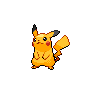

In [7]:
poke.display_img()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [38]:
# Create a method for your Pokemon class that takes in user input, 
# to ask what new pokemon your current pokemon should evolve into.

In [39]:
# Create a method
# Take in user input, should be a pokemons name
# Update the current pokemon's attributes (their height, weight, sprite, etc.) to the new pokemon's values

Pikachu can't evolve.


In [8]:
import requests
from IPython.display import Image
class Pokemon():
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite =None
        self.poke_api_call()
        
    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        if response.status_code == 200:
            data = response.json()
            self.name = data['name']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'],types))
            self.weight = data['weight']
            abilities = data['abilities']
            self.abilities=list(map(lambda x: x['ability']['name'], abilities))
            self.sprite = data['sprites']['front_shiny']
            self.id = data['id']
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
            
    def display_img(self):
            display(Image(self.sprite, width=200)) 
            
# Exercise 2:
# Create a Method that evolves your Pokemon
# If your pokemon can't evolve any further print a message that says "<name of pokemon> can't evolve."
            
    def evolve(self,new_name):
        self.new_name = new_name
        print(f'Your pokemon was: {self.name.title()}')
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.new_name}/')
        if response.status_code != 200:
            print(f'ERROR, STATUS CODE {response.status_code}')
        elif self.name != self.new_name and self.id != self.new_name: 
            self.name = new_name
            self.poke_api_call()
            self.display_img()
            print(f'Your pokemon ivolved into {self.name.title()}')
            print(f'Type: {self.types}\nWeight: {self.weight}\nAbilities: {self.abilities}')
        else:
            print(f"{self.name.title()} can't evolve.")


            
            
            

In [9]:
poke = Pokemon('pikachu')

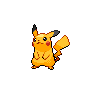

In [10]:
poke.display_img()

Your pokemon was: Pikachu


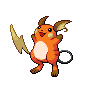

Your pokemon ivolved into Raichu
Type: ['electric']
Weight: 300
Abilities: ['static', 'lightning-rod']


In [12]:
poke.evolve('raichu')

#  Final Exercise (Optional): <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [31]:
import requests
from IPython.display import Image
class Move_Tutor():
    def __init__(self):
        self.move_list = []
        
    def teach_move(self):
        input_move = input("Which move do you want to add?: ")
        if input_move in self.move_list:
            print(f'{input_move} already exist.')
        elif len(self.move_list) < 4:
            self.move_list.append(input_move)
            print(f'{input_move} added to {self.name} list')
        else:
            print(f"{self.name} already has 4 moves.")
            choice = input("Do you want to replace a move? (y/n)").lower()
            if choice == "y":
                for move in self.move_list:
                    print(move)
                replace = input("Enter the move you want to replace: ")
                if replace in self.move_list:
                    self.move_list.remove(replace)
                    self.move_list.append(input_move)
                    print(f'{replace} replaced with {input_move}')
            else:
                print(f'{replace} is not in the list.')
                print(show_moves())
        
    def show_moves(self):
        print(f'Your pokemon knows: {self.move_list}' )
        
class Pokemon(Move_Tutor):
    def __init__(self, name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite =None
        self.moves= None
        self.move_list = []
        self.poke_api_call()
        
    def poke_api_call(self):
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        if response.status_code == 200:
            data = response.json()
            self.name = data['name']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'],types))
            self.weight = data['weight']
            abilities = data['abilities']
            self.abilities=list(map(lambda x: x['ability']['name'], abilities))
            moves = data['moves']
            self.moves =list(map(lambda x: x['move']['name'], moves))
            self.sprite = data['sprites']['front_shiny']
            self.id = data['id']
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
            
    def available_moves(self):
        for move in self.moves:
            print(move)
                    

In [33]:
pikachu = Pokemon('bulbasaur')

In [35]:
pikachu.available_moves()

razor-wind
swords-dance
cut
bind
vine-whip
headbutt
tackle
body-slam
take-down
double-edge
growl
strength
mega-drain
leech-seed
growth
razor-leaf
solar-beam
poison-powder
sleep-powder
petal-dance
string-shot
toxic
rage
mimic
double-team
defense-curl
light-screen
reflect
bide
sludge
skull-bash
amnesia
flash
rest
substitute
snore
curse
protect
sludge-bomb
mud-slap
outrage
giga-drain
endure
charm
false-swipe
swagger
fury-cutter
attract
sleep-talk
return
frustration
safeguard
sweet-scent
synthesis
hidden-power
sunny-day
rock-smash
facade
nature-power
helping-hand
ingrain
knock-off
secret-power
weather-ball
grass-whistle
bullet-seed
magical-leaf
natural-gift
worry-seed
seed-bomb
energy-ball
leaf-storm
power-whip
captivate
grass-knot
venoshock
round
echoed-voice
grass-pledge
work-up
grassy-terrain
confide
grassy-glide


In [34]:
pikachu.teach_move()

Which move do you want to add?: bl
bl added to bulbasaur list


In [27]:
pikachu.show_moves()

Your pokemon knows: ['flower']
